In [1]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal
from keras.applications import *
import keras.backend as K

Using TensorFlow backend.


In [2]:
import os
import time

# FCN model

Code borrows from [jgraving/keras-fcn-1](https://github.com/jgraving/keras-fcn-1/blob/master/fcn/fcn.py), which is forked from [JihongJu/keras-fcn](https://github.com/JihongJu/keras-fcn).

In [3]:
from FCN8s_keras import FCN

In [4]:
model = FCN()

### Load FCN8s model weights

In [5]:
model.load_weights("Keras_FCN8s_face_seg_YuvalNirkin.h5")

### Load image

In [6]:
import cv2

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def vgg_preprocess(im):
    im = cv2.resize(im, (500, 500))
    in_ = np.array(im, dtype=np.float32)
    in_ = in_[:,:,::-1]
    in_ -= np.array((104.00698793,116.66876762,122.67891434))
    in_ = in_[np.newaxis,:]
    #in_ = in_.transpose((2,0,1))
    return in_
  
def auto_downscaling(im):
    w = im.shape[1]
    h = im.shape[0]
    while w*h >= 700*700:
        im = cv2.resize(im, (0,0), fx=0.5, fy=0.5)
        w = im.shape[1]
        h = im.shape[0]
    return im

In [9]:
fn = "input_img.jpg"
im = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
im = auto_downscaling(im)

In [10]:
#im.shape

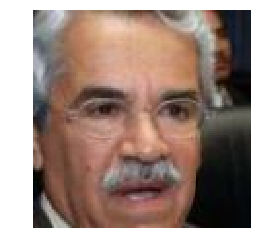

In [11]:
plt.axis('off')
plt.imshow(im)

In [12]:
# vgg_preprocess: output BGR channel w/ mean substracted.
inp_im = vgg_preprocess(im)

### model.predict()

In [13]:
out = model.predict([inp_im])

In [14]:
# post-process for display
out_resized = cv2.resize(np.squeeze(out), (im.shape[1],im.shape[0]))
out_resized_clipped = np.clip(out_resized.argmax(axis=2), 0, 1).astype(np.float64)

## Show results

In [15]:
#out.shape

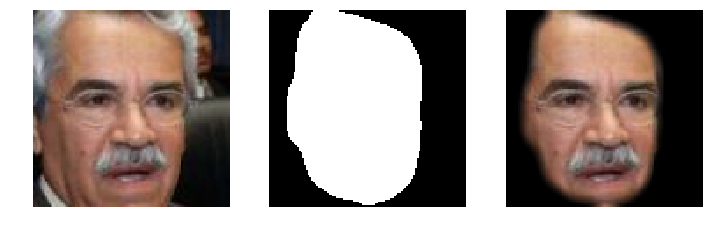

In [16]:
plt.figure(figsize=(12,6))
plt.subplot("131")
plt.axis('off')
plt.imshow(im)
plt.subplot("132")
plt.axis('off')
plt.imshow(out_resized_clipped, cmap='gray')
plt.subplot("133")
plt.axis('off')
mask = cv2.GaussianBlur(out_resized_clipped, (7,7), 6)
plt.imshow((mask[:,:,np.newaxis]*im.astype(np.float64)).astype(np.uint8))

In [21]:
out_resized_clipped[50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])